<a href="https://colab.research.google.com/github/AmiranGozalishvili/Data_Science_course/blob/main/Air_Quality_Neural_Net_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Overview**

Data

Regression analysis of Air Quality dataset

Target - C6H6(GT)

-200 indicates missing values


Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

Attribute Information:

0 Date (DD/MM/YYYY)

1 Time (HH.MM.SS)

2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)

3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

7 True hourly averaged NOx concentration in ppb (reference analyzer)

8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

12 Temperature in  °C

13 Relative Humidity (%)

14 AH Absolute Humidity


In [ ]:
import torch
import torch.optim as optim
import torch.utils.data as data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.decomposition import PCA

In [ ]:
from sklearn.impute import SimpleImputer
import warnings
from IPython.display import set_matplotlib_formats
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 7)

In [ ]:
dataframe = pd.read_csv("/content/AirQualityUCI (1).csv", sep= ";")

In [ ]:
df = dataframe

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [ ]:
df.describe(include='all')

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357,9357,9357,9357.000000,9357.000000,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357,9357,9357,0.0,0.0
unique,391,24,104,NaN,NaN,408,NaN,NaN,NaN,NaN,NaN,NaN,437,754,6684,NaN,NaN
top,21/09/2004,18.00.00,-200,NaN,NaN,"-200,0",NaN,NaN,NaN,NaN,NaN,NaN,-200,-200,-200,NaN,NaN
freq,24,390,1592,NaN,NaN,366,NaN,NaN,NaN,NaN,NaN,NaN,366,366,366,NaN,NaN
mean,NaN,NaN,NaN,1048.990061,-159.090093,NaN,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,329.832710,139.789093,NaN,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-200.000000,-200.000000,NaN,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,921.000000,-200.000000,NaN,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1053.000000,-200.000000,NaN,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1221.000000,-200.000000,NaN,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN,NaN,NaN,NaN


# data inspection

In [ ]:
# check dimensions of dataframe
print(len(df.columns), len(df))

17 9471


In [ ]:
# find number of 'NaN', missing values in data
print(df.isnull().sum())

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


In [ ]:
print(df.isna().sum())

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


In [ ]:
print(df.dtypes)

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object


# Descriptive Statistics

In [ ]:
# print((df['PT08.S5(O3)']==-200).sum())
df['PT08.S5(O3)'].replace(to_replace=-200, value=np.nan, inplace=True)
df['PT08.S5(O3)'].value_counts()

825.0     20
836.0     20
826.0     19
926.0     18
777.0     17
          ..
339.0      1
333.0      1
2152.0     1
2165.0     1
374.0      1
Name: PT08.S5(O3), Length: 1743, dtype: int64

In [ ]:
df.isna().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       480
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [ ]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [ ]:
print(df.select_dtypes('number').columns)
print(df.select_dtypes(np.object).columns)

Index(['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
       'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')
Index(['Date', 'Time', 'CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'], dtype='object')


In [ ]:
print(df['PT08.S5(O3)'].mean())
print(df['PT08.S5(O3)'].median())
print('min:',df['PT08.S5(O3)'].min())
print("max:",df['PT08.S5(O3)'].max())
print("max-min:", df['PT08.S5(O3)'].max()-df['PT08.S5(O3)'].min())

1022.9061283505728
963.0
min: 221.0
max: 2523.0
max-min: 2302.0


In [ ]:
print('Q1',df['PT08.S5(O3)'].quantile(0.25))
print('Q3',df['PT08.S5(O3)'].quantile(0.75))
# IQR = Q3 - Q1
print('IQR', df['PT08.S5(O3)'].quantile(0.75) - df['PT08.S5(O3)'].quantile(0.25))

Q1 731.5
Q3 1273.5
IQR 542.0


In [ ]:
#Outlier limits
#Q3 + 1.5 IQR and Q1 - 1.5 IQR
Q1 = df['PT08.S5(O3)'].quantile(0.25)
Q3 = df['PT08.S5(O3)'].quantile(0.75)
IQR = Q3 - Q1
#lower limit:
lower_limit = Q1 - 1.5 * IQR
print('lower limit:', lower_limit)
#upper limit:
upper_limit = Q3 + 1.5 * IQR
print('upper limit:', Q3 + 1.5 * IQR)

lower limit: -81.5
upper limit: 2086.5


In [ ]:
#Outliers
#Values above median + 1.5 IQR and below median - 1.5 IQR:
df['PT08.S5(O3)'][(Q1 - 1.5 * IQR >= df['PT08.S5(O3)']) |  (df['PT08.S5(O3)'] >= Q3 + 1.5 * IQR)]
outliers = (df['PT08.S5(O3)'][(Q1 - 1.5 * IQR >= df['PT08.S5(O3)']) |  (df['PT08.S5(O3)'] >= Q3 + 1.5 * IQR)])
print(outliers)

111     2184.0
121     2122.0
169     2306.0
170     2359.0
1167    2108.0
         ...  
8143    2226.0
8738    2088.0
8882    2140.0
9074    2159.0
9098    2129.0
Name: PT08.S5(O3), Length: 93, dtype: float64


In [ ]:
# standard deviation is square root of the variance
# variance is measure how spread out values are
print('variance:',df['PT08.S5(O3)'].var())
print('standard deviation:',df['PT08.S5(O3)'].std())

variance: 158789.72756088185
standard deviation: 398.48428772146315


# Data visualization

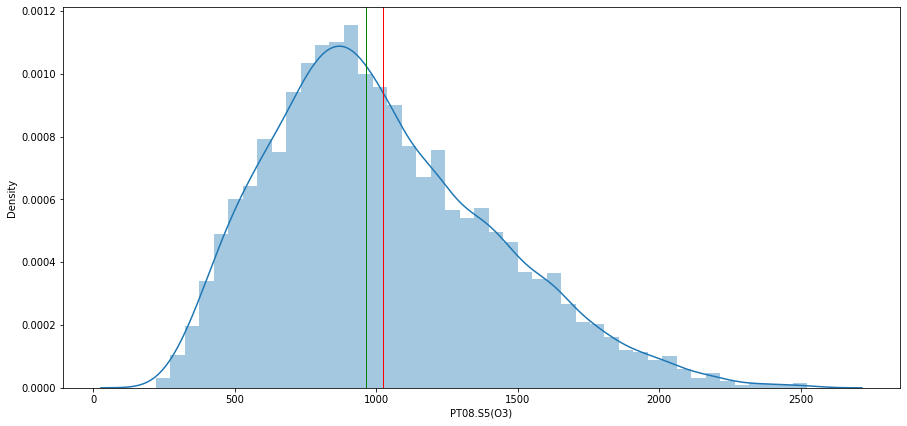

In [ ]:
sns.distplot(df['PT08.S5(O3)'])
plt.axvline(df['PT08.S5(O3)'].mean(), linewidth=1 , color = 'red')
plt.axvline(df['PT08.S5(O3)'].median(), linewidth=1 , color = 'green')
plt.show()

<Axes: xlabel='Date', ylabel='PT08.S5(O3)'>

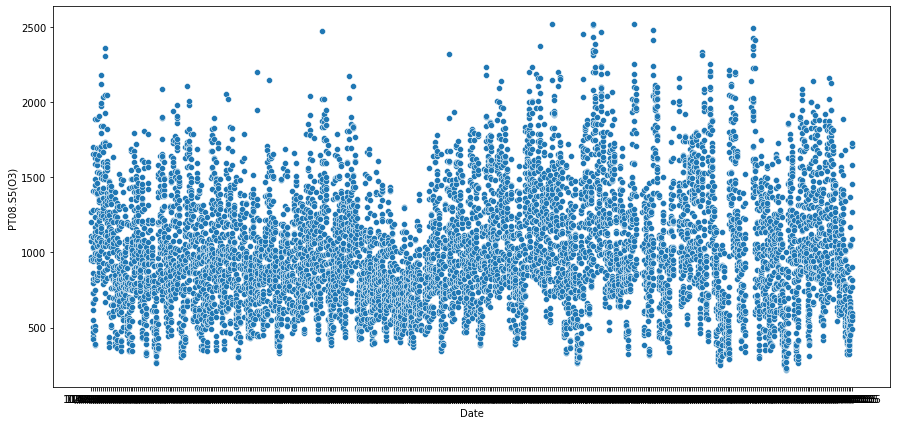

In [ ]:
sns.scatterplot(data=df, x="Date", y="PT08.S5(O3)")

<Axes: xlabel='C6H6(GT)', ylabel='PT08.S5(O3)'>

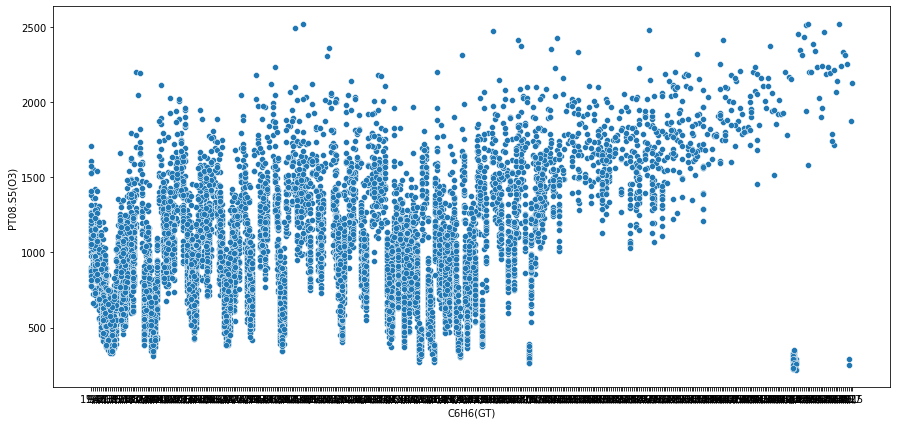

In [ ]:
sns.scatterplot(data=df, x="C6H6(GT)", y="PT08.S5(O3)")

<Axes: >

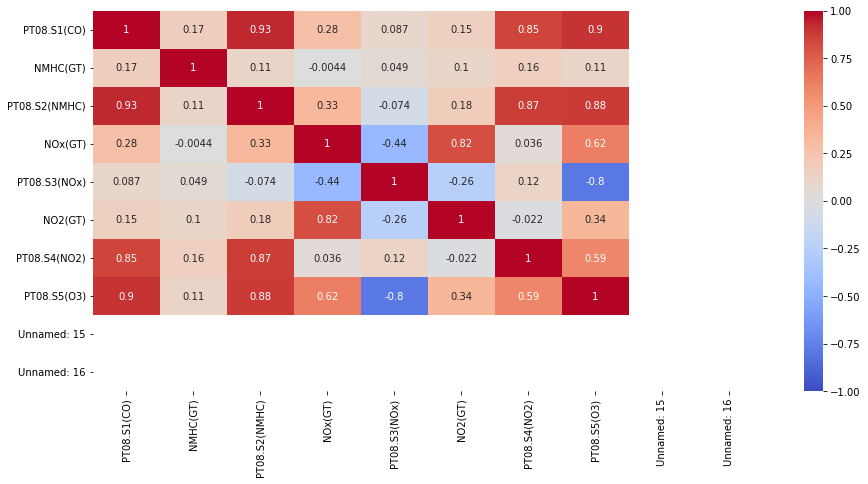

In [ ]:
sns.heatmap(df.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot= True)

# Data preparation

In [ ]:
# check frequency of unique column values if result is 1 it means unique values are majority of columns

(df.nunique()/len(df)).sort_values(ascending = False)

AH               0.705733
PT08.S5(O3)      0.184035
PT08.S4(NO2)     0.169359
PT08.S2(NMHC)    0.131559
PT08.S3(NOx)     0.129025
PT08.S1(CO)      0.110020
NOx(GT)          0.097772
RH               0.079611
T                0.046141
NMHC(GT)         0.045402
C6H6(GT)         0.043079
Date             0.041284
NO2(GT)          0.029986
CO(GT)           0.010981
Time             0.002534
Unnamed: 15      0.000000
Unnamed: 16      0.000000
dtype: float64

In [ ]:
# if variance is 0 it means that column has all same value and this columns is usless while computing
df.var().sort_values()[:5]

NO2(GT)          16113.879181
NMHC(GT)         19540.990493
NOx(GT)          66272.195514
PT08.S3(NOx)    103679.847274
PT08.S1(CO)     108789.616511
dtype: float64

In [ ]:
df.var().sort_values()[-5:]

PT08.S2(NMHC)    117192.055185
PT08.S5(O3)      158789.727561
PT08.S4(NO2)     218285.300489
Unnamed: 15                NaN
Unnamed: 16                NaN
dtype: float64

In [ ]:
# check missing data. if missing data percentage is too high like 90% or higher, this column can be deleted

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
mis_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'percent'])
mis_data.head()

,Total,percent
Unnamed: 16,9471,1.000000
Unnamed: 15,9471,1.000000
PT08.S5(O3),480,0.050681
NO2(GT),114,0.012037
AH,114,0.012037


In [ ]:
df.isna().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       480
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [ ]:
# drop useless columns from dataset

In [ ]:
df = df.drop(['Unnamed: 15'], axis = 1)
df = df.drop(['Unnamed: 16'], axis = 1)
# df = df.drop(['NOx(GT)'], axis = 1)

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
new_df = pd.DataFrame(df)

In [ ]:
new_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


#convert object data into numerical

some of data columns has object type data but while explore

it,s looks like numerical. difference is only that here is ',' instead of '.'

(for example '2,5' is object, but '2.5' is integer) so i decided to convert  

this type of data from object to numerical

In [ ]:
new_df[['day', 'month', 'year']] = new_df["Date"].apply(lambda x: pd.Series(str(x).split("/")))
new_df[['hour', 'min', 'sec']] = new_df["Time"].apply(lambda x: pd.Series(str(x).split(".")))

In [ ]:
date = pd.DataFrame(new_df[['Date', 'Time']])

In [ ]:
date['Date'] = pd.to_datetime(date['Date'], format='%d/%m/%Y')

In [ ]:
date.dtypes

Date    datetime64[ns]
Time            object
dtype: object

In [ ]:
new_df = new_df.drop(['min', 'sec'], axis = 1)
new_df = new_df.drop(['Date', 'Time'], axis = 1)

In [ ]:
# object to int
obj_features = new_df.select_dtypes(np.object).columns

for i in obj_features:
  new_df[i]= new_df[i].apply(lambda x: float(x.replace(',', '.')) if isinstance(x,str)else pd.np.nan)

In [ ]:
new_df.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
day              float64
month            float64
year             float64
hour             float64
dtype: object

as we can see we after converting data columns, there is only numerical data types and we can easily start use it

# fill missing data

-200 is represented as missing values

 I think it will be easy to fill '-200' values with 'nan' because while we use SimpleImputer this will be much easy to refill missing values with mean, most frequent or something else.

In [ ]:
new_df.replace(to_replace=-200, value=np.nan, inplace=True)

In [ ]:
def simple_imputer(data, imputer=None):
  num_features = data.select_dtypes('number').columns
  # imputer for numerical data
  if imputer is None:
      imputer = SimpleImputer(missing_values= np.nan, strategy='mean', verbose = True)
      imp_mean_data = pd.DataFrame(imputer.fit_transform(data[num_features]), columns=num_features)
  else:
      imp_mean_data = pd.DataFrame(imputer.transform(data[num_features]), columns=num_features)

  return imp_mean_data, imputer

In [ ]:
def pca(data, pca=None):
  num_features = data.select_dtypes('number').columns

  if pca is None:
    # pca = PCA(n_components='mle', svd_solver='full')
    pca = PCA(n_components == 'mle', solver='auto')
    pca_transform = pca.fit_transform(data[num_features])
  else:
    pca_transform = pca.transform(data[num_features])
  return pca_transform, pca

reindex and resample dataset.



In [ ]:
def reindex(data):
  data.set_index(date['Date'], inplace=True)
  data = data.resample('D').sum()
  data = data.reset_index()
  data = data.drop('Date', axis=1)
  return data

In [ ]:
new_df=reindex(new_df)

# split dataset Train Test

In [ ]:
X = new_df.drop(['C6H6(GT)'], axis=1)
y = new_df['C6H6(GT)']

In [ ]:
X.head()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,day,month,year,hour
0,11.8,7899.0,519.0,5474.0,792.0,7004.0,653.0,9273.0,6576.0,72.2,329.4,4.5938,60.0,18.0,12024.0,123.0
1,51.5,29860.0,2508.0,20447.0,3321.0,30654.0,2297.0,36548.0,21246.0,236.1,1537.8,18.6184,264.0,72.0,48096.0,276.0
2,61.7,30760.0,3596.0,24199.0,3822.0,26445.0,2558.0,39055.0,26025.0,270.9,1226.3,15.9145,288.0,72.0,48096.0,276.0
3,62.0,31936.0,3342.0,23828.0,4242.0,23837.0,2734.0,38299.0,29902.0,308.8,1236.8,17.5751,312.0,72.0,48096.0,276.0
4,56.8,32667.0,2807.0,22654.0,3372.0,24031.0,2539.0,38457.0,29621.0,384.3,1172.4,20.3921,336.0,72.0,48096.0,276.0


In [ ]:
X_train = X[:-30]
X_test = X[-30:]
y_train = y[:-30]
y_test = y[-30:]

In [ ]:
X_train, _train_imputer = simple_imputer(X_train)
X_test, _ = simple_imputer(X_test, _train_imputer)

In [ ]:
X_train, _train_pca = pca(X_train)
X_test, _ = pca(X_test, _train_pca)

#Tensorflow sequetial model for linear regression

In [ ]:
# define model
model = Sequential()
model.add(Dense(100, activation='relu'))
model.add(Dense(70))
model.add(Dense(40))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'mape'])
# fit model
hist = model.fit(X_train, y_train, batch_size=32, validation_split=0.1, epochs=2000, verbose=0)
# demonstrate prediction
y_pred = model.predict(X_test, verbose=0)

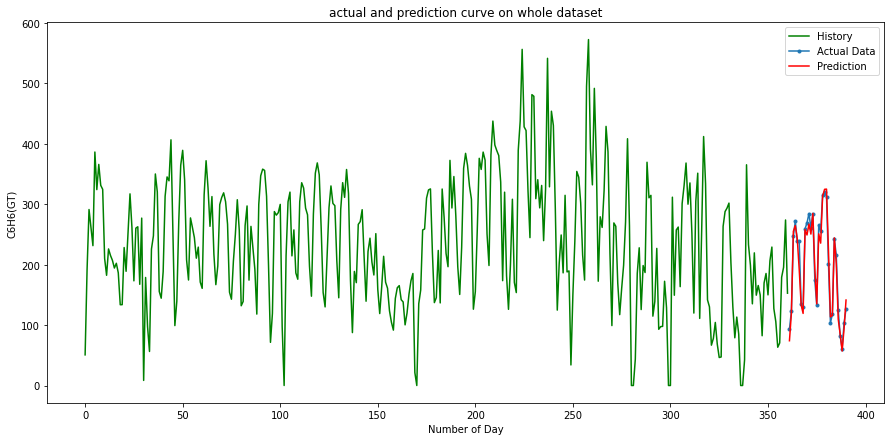

In [ ]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual Data")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="Prediction")
plt.title("actual and prediction curve on whole dataset")
plt.ylabel('C6H6(GT)')
plt.xlabel('Number of Day')
plt.legend()
plt.show();

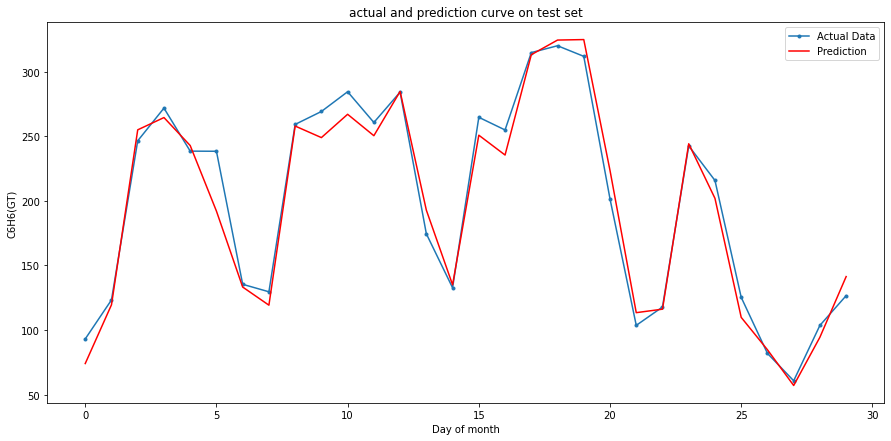

In [ ]:
plt.plot(np.arange(0, len(y_test)), y_test, marker='.', label="Actual Data")
plt.plot(np.arange(0, len(y_pred)), y_pred, 'r', label="Prediction")
plt.title("actual and prediction curve on test set")
plt.ylabel('C6H6(GT)')
plt.xlabel('Day of month')
plt.legend()
plt.show();

In [ ]:
scores = ['loss','mse', 'mae', 'mape']

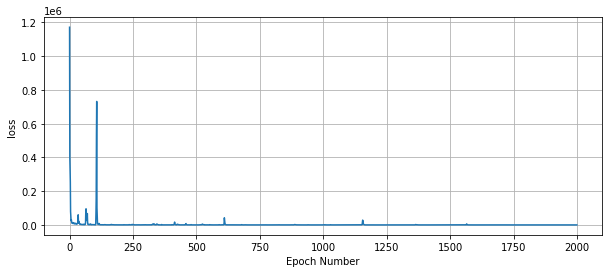

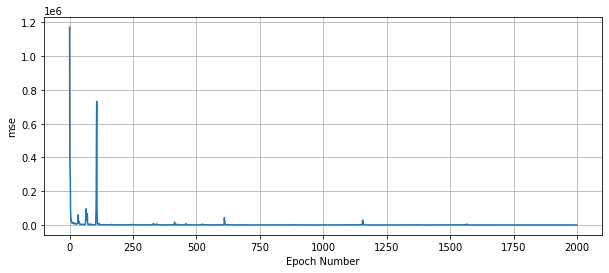

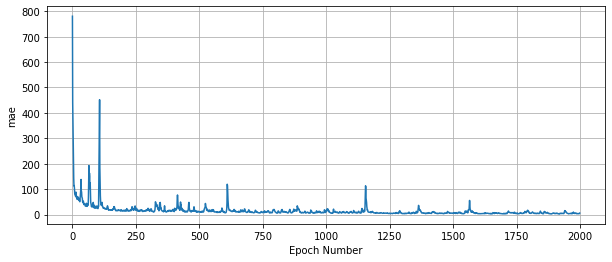

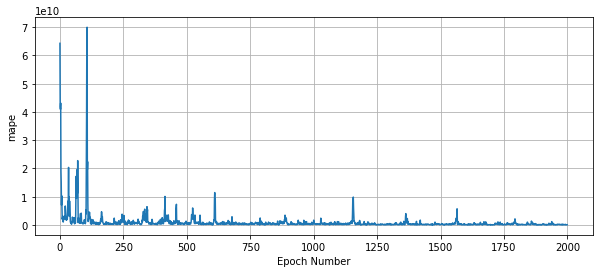

In [ ]:
plt.rcParams["figure.figsize"] = (10, 4)
for i in scores:
  plt.xlabel('Epoch Number')
  plt.ylabel(i)
  plt.plot(hist.history[i])
  plt.grid()
  plt.show()


# Time Series with pytorch

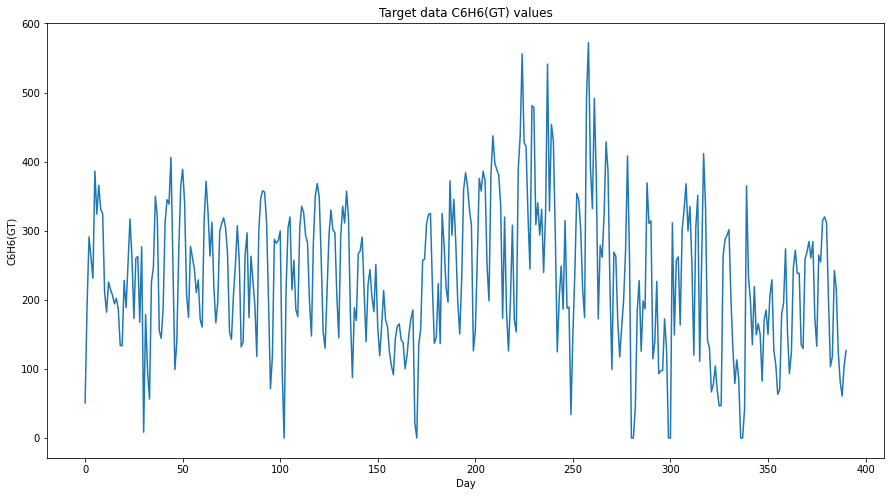

In [ ]:
plt.rcParams["figure.figsize"] = (15, 8)
timeseries = new_df[['C6H6(GT)']].values.astype('float32')
plt.title("Target data C6H6(GT) values")
plt.xlabel("Day")
plt.ylabel("C6H6(GT)")
plt.plot(timeseries)
plt.show()

Time series data train test split

In [ ]:
# train-test split for time series
train_size = int(len(timeseries) * 0.9)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

In [ ]:
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [ ]:
lookback = 1
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([350, 1, 1]) torch.Size([350, 1, 1])
torch.Size([39, 1, 1]) torch.Size([39, 1, 1])


neural network with LSTM

In [ ]:
...
import torch.nn as nn

class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

In [ ]:
model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 258.8511, test RMSE 204.0184
Epoch 100: train RMSE 135.4086, test RMSE 86.8003
Epoch 200: train RMSE 97.5384, test RMSE 74.0647
Epoch 300: train RMSE 96.4785, test RMSE 63.9130
Epoch 400: train RMSE 89.0310, test RMSE 72.8417
Epoch 500: train RMSE 86.8201, test RMSE 65.3987
Epoch 600: train RMSE 88.1388, test RMSE 72.8660
Epoch 700: train RMSE 87.3587, test RMSE 71.1143
Epoch 800: train RMSE 86.5019, test RMSE 69.3554
Epoch 900: train RMSE 86.2707, test RMSE 63.6997
Epoch 1000: train RMSE 87.6577, test RMSE 71.2994
Epoch 1100: train RMSE 86.2285, test RMSE 68.7113
Epoch 1200: train RMSE 85.4293, test RMSE 66.9394
Epoch 1300: train RMSE 85.2490, test RMSE 64.2965
Epoch 1400: train RMSE 86.0533, test RMSE 68.4103
Epoch 1500: train RMSE 86.9658, test RMSE 69.1856
Epoch 1600: train RMSE 84.8556, test RMSE 65.4831
Epoch 1700: train RMSE 87.3202, test RMSE 64.8525
Epoch 1800: train RMSE 85.3864, test RMSE 66.1046
Epoch 1900: train RMSE 84.7104, test RMSE 64.3137
Epoch 0: 

In [ ]:
print(train_rmse, test_rmse)

tensor(85.4211) tensor(64.4435)


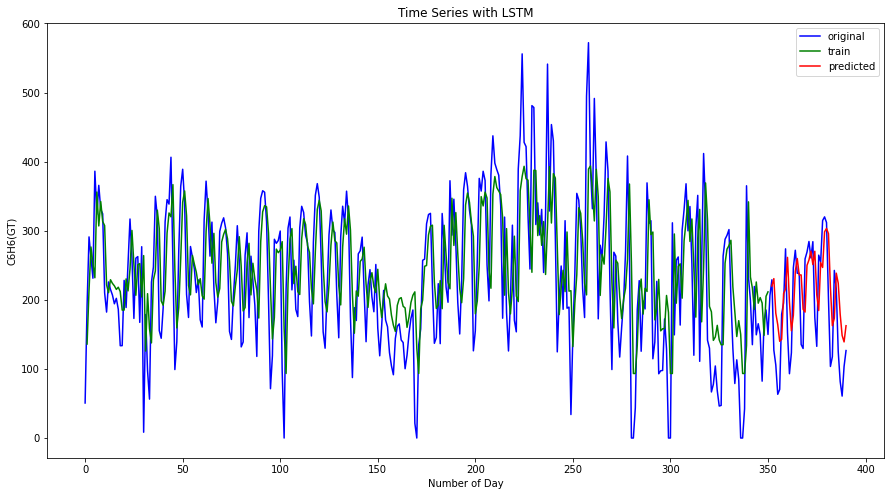

In [ ]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
# plot
plt.plot(timeseries, c='b', label='original')
plt.plot(train_plot, c='g', label='train')
plt.plot(test_plot, c='r', label='predicted')

plt.title('Time Series with LSTM')
plt.xlabel('Number of Day')
plt.ylabel('C6H6(GT)')
plt.legend(loc='best')
plt.show()